#  Big Data Mart Sales

# Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/bigdatamart_rep

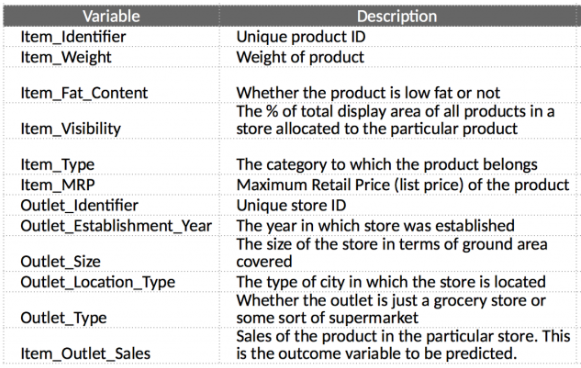

### We have two different data set for training and testing model. So we will at first statisically explore and clean these dataset individually. After that we will perfom EDA on training data. Once we done with EDA, next thing is feature engineering and selection Separately on train & test dataset. At last we will go for model building on training dataset and testing on test dataset with various ML algorithim. Crossvalidation and evalution matrix will employ sepeartely before deciding final model.

## Importing Train and Test csv file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('bigdatamart_Train.csv')

In [3]:
print('\033[1m' +' Train Data No of Rows & Columns:'+str(train.shape) +'\033[1m')

 Train Data No of Rows & Columns:(8523, 12)


In [4]:
test=pd.read_csv('bigdatamart_Test.csv')

In [5]:
print('\033[1m' +' Test Data No of Rows & Columns:'+str(test.shape) +'\033[1m')

 Test Data No of Rows & Columns:(5681, 11)


# Statistical Anaysis, Data Exploration & Cleaning on Train Dataset

In [6]:
train.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Comment -
1. Train data contain 8523 rows with 11 features and 1 target variable.
2. Some feature are categorical in nature.
3. There is presense of Null values in data.
4. There is missing data in item weight, outlet size which need to impute with appropriate method.

In [8]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

## Indentification of Missing Data

<AxesSubplot:>

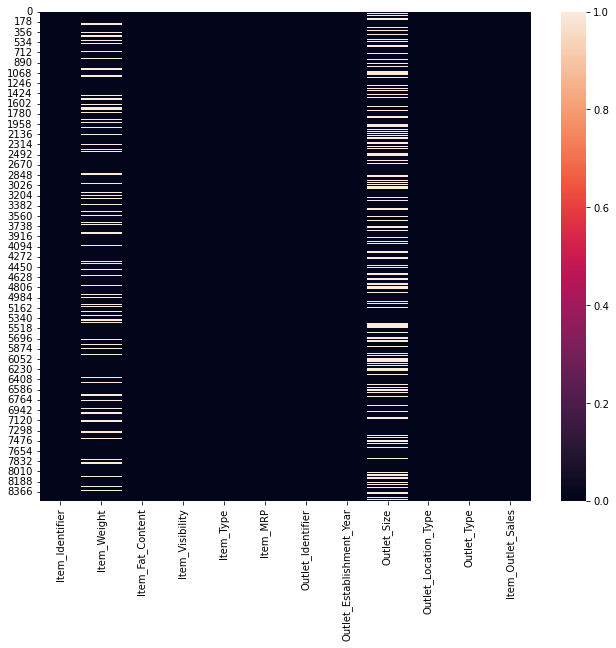

In [9]:
plt.figure(figsize=(11,9))
sns.heatmap(train.isnull())

In [10]:
missing_values = train.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(train))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                           Missing Values  % Missing data
Outlet_Size                          2410       28.276428
Item_Weight                          1463       17.165317
Item_Identifier                         0        0.000000
Item_Fat_Content                        0        0.000000
Item_Visibility                         0        0.000000
Item_Type                               0        0.000000
Item_MRP                                0        0.000000
Outlet_Identifier                       0        0.000000
Outlet_Establishment_Year               0        0.000000
Outlet_Location_Type                    0        0.000000
Outlet_Type                             0        0.000000
Item_Outlet_Sales                       0        0.000000


#### Comment -
1. 28.27% missing data in Outlet size
2. 17.16% missing data in Item weight.
3. Outlet which are very big in size normally have every varity of product avaiable at single place, massive customer footprint and in turn have higher sales. Outlet size is important feature in our analysis. hence we cannot just ignore missing data here.
4. Tier 2 & 3 cities tend to have customer who do not store grocery in big number. Item weight is critical for them. Like Outlet size here also we cannot just ignore missing values.

## Indentifying Unique categories for categorical data

### 1.Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

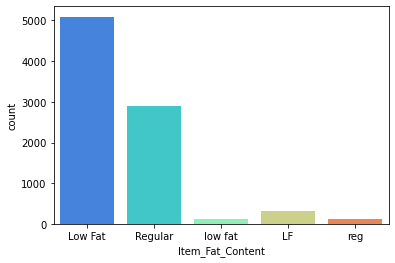

In [11]:
sns.countplot(train['Item_Fat_Content'], palette='rainbow')

In [12]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘reg’. 

We are going to convert them into two catgories - 1. Low Fat  2.Regular

In [14]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('LF','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('low fat','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')

In [15]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### 2. Item_Type & Item_Identifier

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

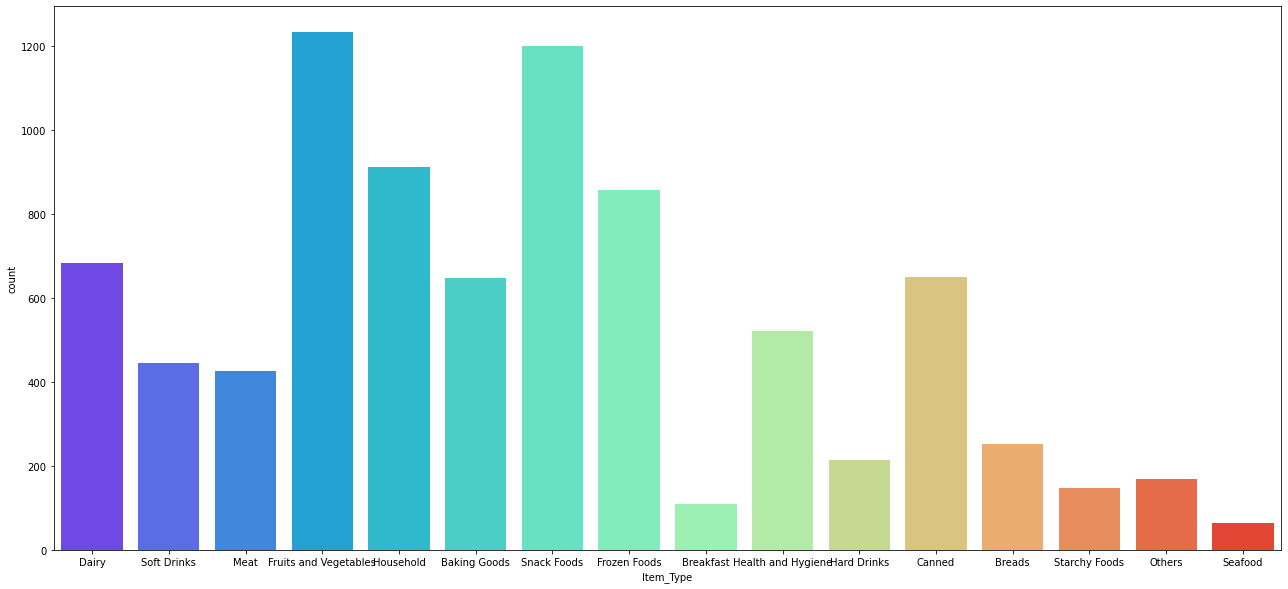

In [16]:
plt.figure(figsize=(22,10))
sns.countplot(train['Item_Type'], palette='rainbow', orient='h')

In [17]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [18]:
train['Item_Type'].nunique()

16

There are 1599 products within 16 different item categories in Big Data Mart store.

In [19]:
train['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

##### If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables.So I’ve used the Item_Identifier variable to create a new column to simplify further analysis.

In [20]:
#Item type combine:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

##### A fat-content should not be specified for Non-consumables them. So I created a new category as Non-Edible for such Nonconsumable under Item Fat Content Column.

In [21]:
train.loc[train['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

### 3.Outlet_Identifier

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

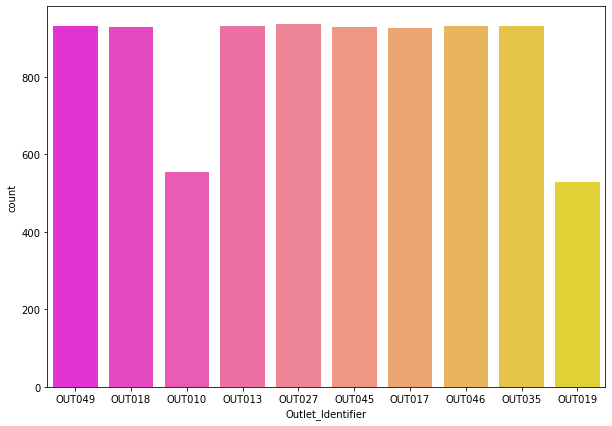

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(train['Outlet_Identifier'], palette='spring')

### 4.Outlet_Type 

In [24]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

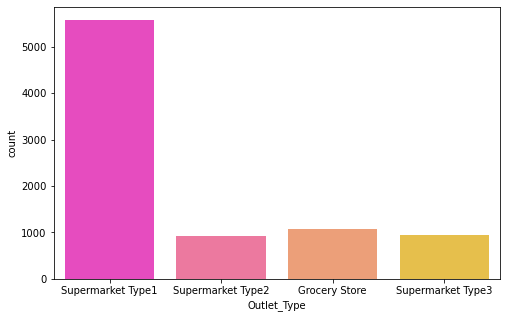

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(train['Outlet_Type'], palette='spring')

In [26]:
#Check the mean sales by type:
train.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

Item_Outlet_Sales
Outlet_Type                         
Grocery Store             339.828500
Supermarket Type1        2316.181148
Supermarket Type2        1995.498739
Supermarket Type3        3694.038558

### 5.Outlet_Location_Type

In [27]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

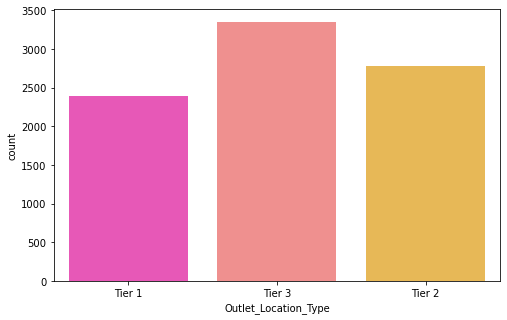

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(train['Outlet_Location_Type'], palette='spring')

In [29]:
#Check the mean sales by type:
train.pivot_table(values='Item_Outlet_Sales', index='Outlet_Location_Type')

Item_Outlet_Sales
Outlet_Location_Type                   
Tier 1                      1876.909159
Tier 2                      2323.990559
Tier 3                      2279.627651

#### Comment -
1. Maximum Number of Outlet are in Tier 3 Cities and they Genearte maximum revenue as compare to Tier 1 & Tier 2.

## Handling Missing Values

### 1. Imputation of Item Weight

In [30]:
train['Item_Weight'].isnull().sum()

1463

##### Lets impute the Item Weight by the average weight of the particular item as per Item_Identifier

In [31]:
train.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930       Non-Edible         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales Item_Type_Combined  
0  Supermarket Type1          3735.1380               Food  
1  Supermarket Type2           443.4228             Drinks  
2  Supermarket Type1          2097.2700               Food  
3      Grocery Store           732.3800               Food  
4  Supermarket Type1           994.7052     Non-Consumable  
5  Supermarket Type2           556.6088               Food  
6  Supermarket Type1           343.5528               Food  
7  Supermarket Type3          4022.7636               Food  
8  Supermarket Type1          1076.5986               Food  
9  Supermarket Type1          4710.5350               Food

In [32]:
mean_item_weight=train.groupby('Item_Type').agg({'Item_Weight':'mean'})
mean_item_weight

Item_Weight
Item_Type                         
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731

In [33]:
#dictionary with Item_Type values as keys and avg_wt values as values.
mean_zip=dict(zip(mean_item_weight.index,mean_item_weight.Item_Weight))

# This creates a column "mean_zip" and maps values into it based on corresponding values of 'Item_Type'
train['mean_zip']=train['Item_Type'].map(mean_zip)

#filling null values in 'Item_Weight' with values from 
train['Item_Weight']=train['Item_Weight'].fillna(train['mean_zip'])

In [34]:
train['Item_Weight'].isna().sum()

0

In [35]:
train.drop(columns='mean_zip',inplace=True)

### 2. Imputation of Outlet Size

In [36]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [37]:
train['Outlet_Size'].isna().sum()

2410

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

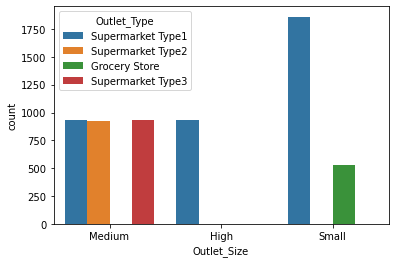

In [38]:
sns.countplot('Outlet_Size',hue='Outlet_Type',data=train)

Lets impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [39]:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = train.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )

In [40]:
outlet_size_mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [41]:
miss_bool = train['Outlet_Size'].isnull() 
train.loc[miss_bool,'Outlet_Size'] = train.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(train['Outlet_Size'].isnull()))

0


##### Missing Values table after imputation

In [42]:
missing_values = train.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(train))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                           Missing Values  % Missing data
Item_Identifier                         0             0.0
Item_Weight                             0             0.0
Item_Fat_Content                        0             0.0
Item_Visibility                         0             0.0
Item_Type                               0             0.0
Item_MRP                                0             0.0
Outlet_Identifier                       0             0.0
Outlet_Establishment_Year               0             0.0
Outlet_Size                             0             0.0
Outlet_Location_Type                    0             0.0
Outlet_Type                             0             0.0
Item_Outlet_Sales                       0             0.0
Item_Type_Combined                      0             0.0


## Exploration of Train Numerical data

### Item_Visibility

The min value of Item_Visibility is 0, but this can not be as every item which sold over store must have some visibility.

In [43]:
train[train['Item_Visibility']==0]['Item_Identifier'].nunique()

446

In [44]:
# visual check that the 0 values in the firs 10 entries have been replaced
train['Item_Visibility']=train['Item_Visibility'].replace(0,np.nan)

In [45]:
train['Item_Visibility'].fillna(train['Item_Visibility'].median(),inplace=True)

In [46]:
train[train['Item_Visibility']==0]['Item_Identifier'].nunique()

0

### Outlet_Establishment_Year

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

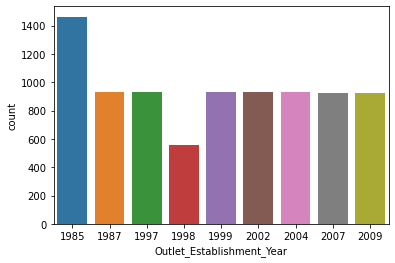

In [47]:
sns.countplot(train.Outlet_Establishment_Year)

In [48]:
train['Outlet_Age'] = train['Outlet_Establishment_Year'].apply(lambda x:2013-x)

In [49]:
train['Outlet_Age'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Age, dtype: int64

---------------------------------------------------------------------------------------------------------------------------

# Statistical Anaysis, Data Exploration & Cleaning on Test Dataset

In [50]:
test.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### Here we are going repeat step that we perform on Training dataset :

##### 1. Missing Value Indentification
##### 2. Modify categories of Item_Fat_Content
##### 3. Create a broad category of Type of Item
##### 4. Imputation of Missing Values
##### 5. Modify Item_Visibility
##### 6. Determine the years of operation of a store

##  Step 1. Missing Value Indentification

<AxesSubplot:>

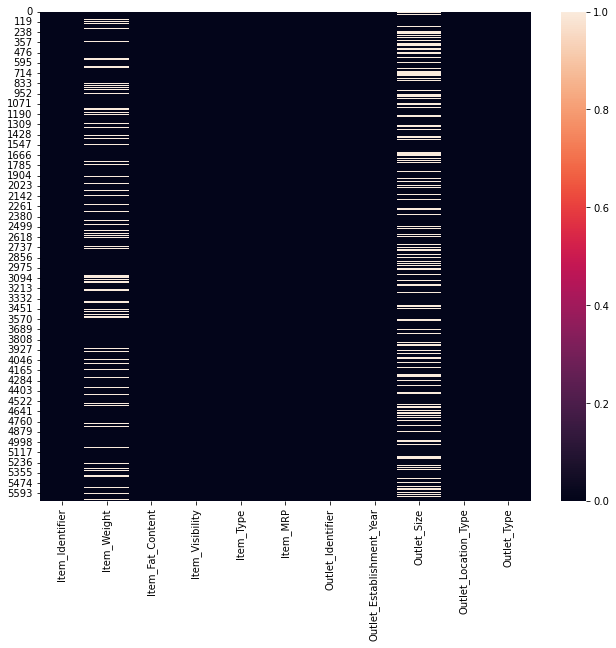

In [52]:
plt.figure(figsize=(11,9))
sns.heatmap(test.isnull())

In [53]:
missing_values = test.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(test))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                           Missing Values  % Missing data
Outlet_Size                          1606       28.269671
Item_Weight                           976       17.180074
Item_Identifier                         0        0.000000
Item_Fat_Content                        0        0.000000
Item_Visibility                         0        0.000000
Item_Type                               0        0.000000
Item_MRP                                0        0.000000
Outlet_Identifier                       0        0.000000
Outlet_Establishment_Year               0        0.000000
Outlet_Location_Type                    0        0.000000
Outlet_Type                             0        0.000000


## Step 2. Modify categories of Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

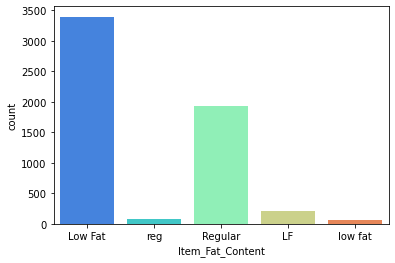

In [54]:
sns.countplot(test['Item_Fat_Content'], palette='rainbow')

In [55]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('LF','Low Fat')
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('low fat','Low Fat')
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('reg','Regular')

In [56]:
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

## Step 3. Create a broad category of Type of Item

In [57]:
#Item type combine:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
test['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

## Step 4. Imputation of Missing Values

### 4.1. Imputation of Item Weight

In [58]:
test['Item_Weight'].isnull().sum()

976

##### Lets impute the Item Weight by the average weight of the particular item as per Item_Identifier

In [59]:
mean_item_weight=test.groupby('Item_Type').agg({'Item_Weight':'mean'})
mean_item_weight

Item_Weight
Item_Type                         
Baking Goods             12.272418
Breads                   10.866799
Breakfast                13.759603
Canned                   12.393565
Dairy                    12.955040
Frozen Foods             12.101543
Fruits and Vegetables    13.146659
Hard Drinks              11.844417
Health and Hygiene       13.216929
Household                13.270504
Meat                     12.702148
Others                   14.009725
Seafood                  13.241136
Snack Foods              12.684256
Soft Drinks              11.691965
Starchy Foods            13.618247

In [60]:
#dictionary with Item_Type values as keys and avg_wt values as values.
mean_zip=dict(zip(mean_item_weight.index,mean_item_weight.Item_Weight))

# This creates a column "mean_zip" and maps values into it based on corresponding values of 'Item_Type'
test['mean_zip']=test['Item_Type'].map(mean_zip)

#filling null values in 'Item_Weight' with values from 
test['Item_Weight']=test['Item_Weight'].fillna(test['mean_zip'])

In [61]:
train['Item_Weight'].isna().sum()

0

In [62]:
test.drop(columns='mean_zip',inplace=True)

### 4.2. Imputation of Outlet Size

In [63]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [64]:
test['Outlet_Size'].isna().sum()

1606

In [65]:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = test.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )

In [66]:
outlet_size_mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [67]:
miss_bool = test['Outlet_Size'].isnull() 
test.loc[miss_bool,'Outlet_Size'] = test.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(train['Outlet_Size'].isnull()))

0


##### Missing Values table after imputation

In [68]:
missing_values = test.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(train))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                           Missing Values  % Missing data
Item_Identifier                         0             0.0
Item_Weight                             0             0.0
Item_Fat_Content                        0             0.0
Item_Visibility                         0             0.0
Item_Type                               0             0.0
Item_MRP                                0             0.0
Outlet_Identifier                       0             0.0
Outlet_Establishment_Year               0             0.0
Outlet_Size                             0             0.0
Outlet_Location_Type                    0             0.0
Outlet_Type                             0             0.0
Item_Type_Combined                      0             0.0


## Step 5. Modify Item_Visibility

In [69]:
test[test['Item_Visibility']==0]['Item_Identifier'].nunique()

321

In [70]:
# visual check that the 0 values in the firs 10 entries have been replaced
test['Item_Visibility']=test['Item_Visibility'].replace(0,np.nan)

In [71]:
test['Item_Visibility'].fillna(test['Item_Visibility'].median(),inplace=True)

In [72]:
test[test['Item_Visibility']==0]['Item_Identifier'].nunique()

0

## Step 6. Determine the years of operation of a store

In [73]:
test['Outlet_Age'] = test['Outlet_Establishment_Year'].apply(lambda x:2013-x)

In [74]:
test['Outlet_Age'].head()

0    14
1     6
2    15
3     6
4    28
Name: Outlet_Age, dtype: int64

---------------------------------------------------------------------------------------------------------------------------

# EDA

In [75]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.057792   
4           NCD19         8.93       Non-Edible         0.057792   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales Item_Type_Combined  Outlet_Age  
0  Supermarket Type1          3735.1380               Food          14  
1  Supermarket Type2           443.4228             Drinks           4  
2  Supermarket Type1          2097.2700               Food          14  
3      Grocery Store           732.3800               Food          15  
4  Supermarket Type1           994.7052     Non-Consumable          26

In [76]:
train.shape

(8523, 14)

In [77]:
df=train.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined'])

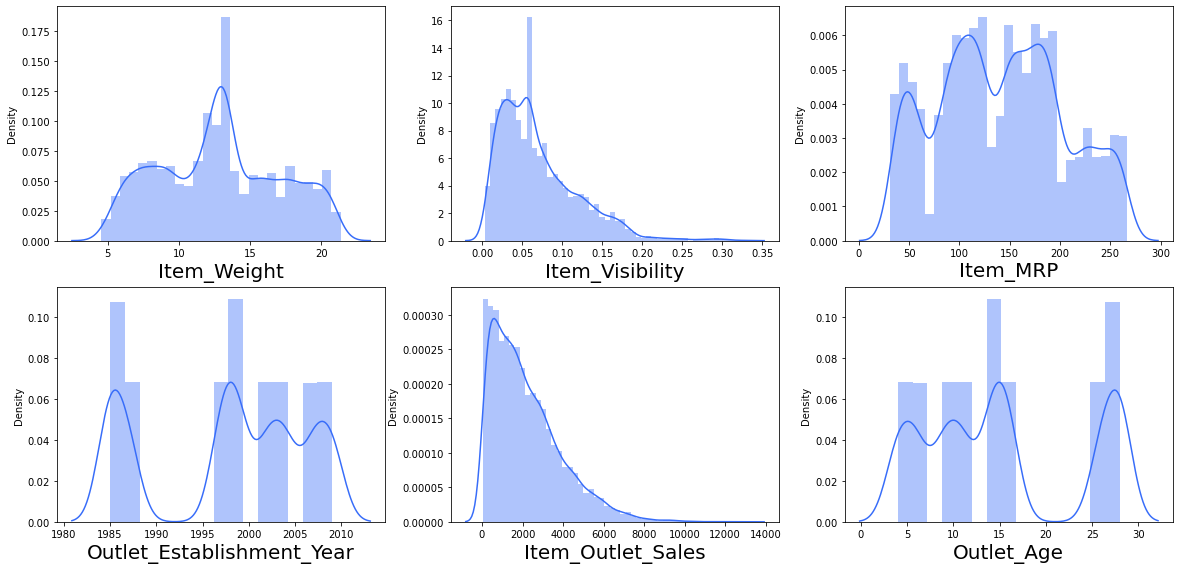

In [78]:
plt.figure(figsize=(20,25), facecolor='white')
sns.set_palette('rainbow')
plotnumber =1
for column in df:
    if plotnumber <=6:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Box plot for outliers detection in Training data

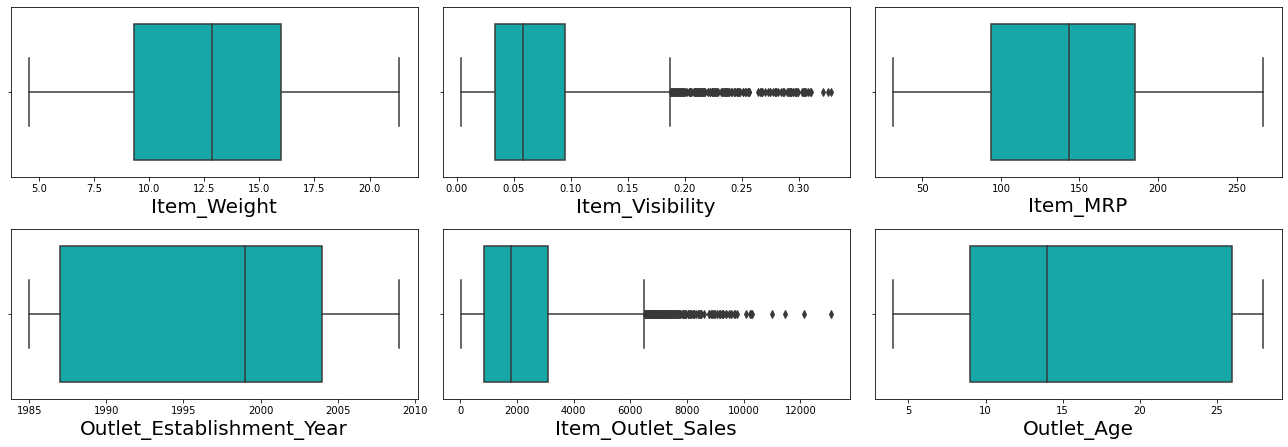

In [79]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=6:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column], color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### Comment-
1. There are outliers in Item visibility and item outlet sales.

#### Box plot for outliers detection in Testing data

In [80]:
df2=test.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined'])

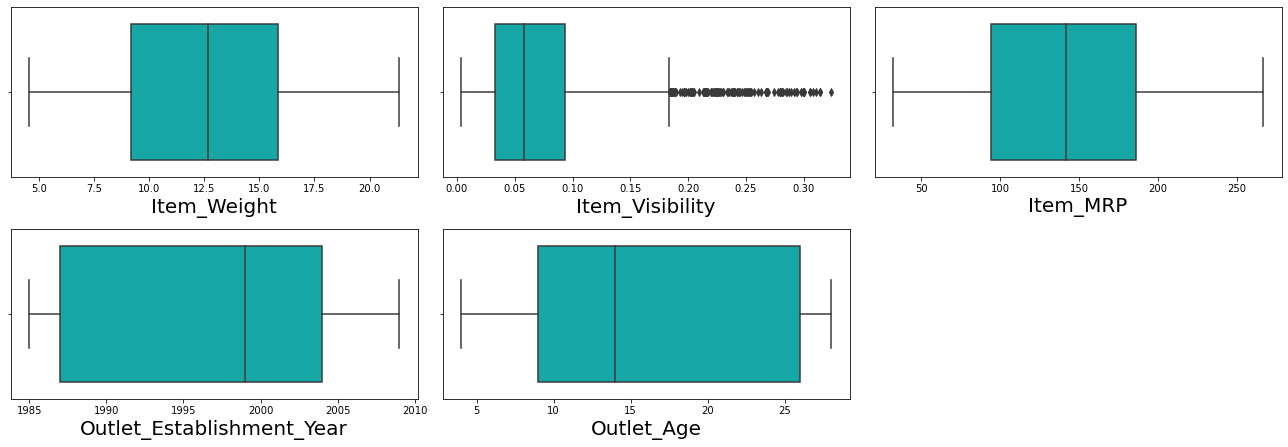

In [81]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=6:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df2[column], color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

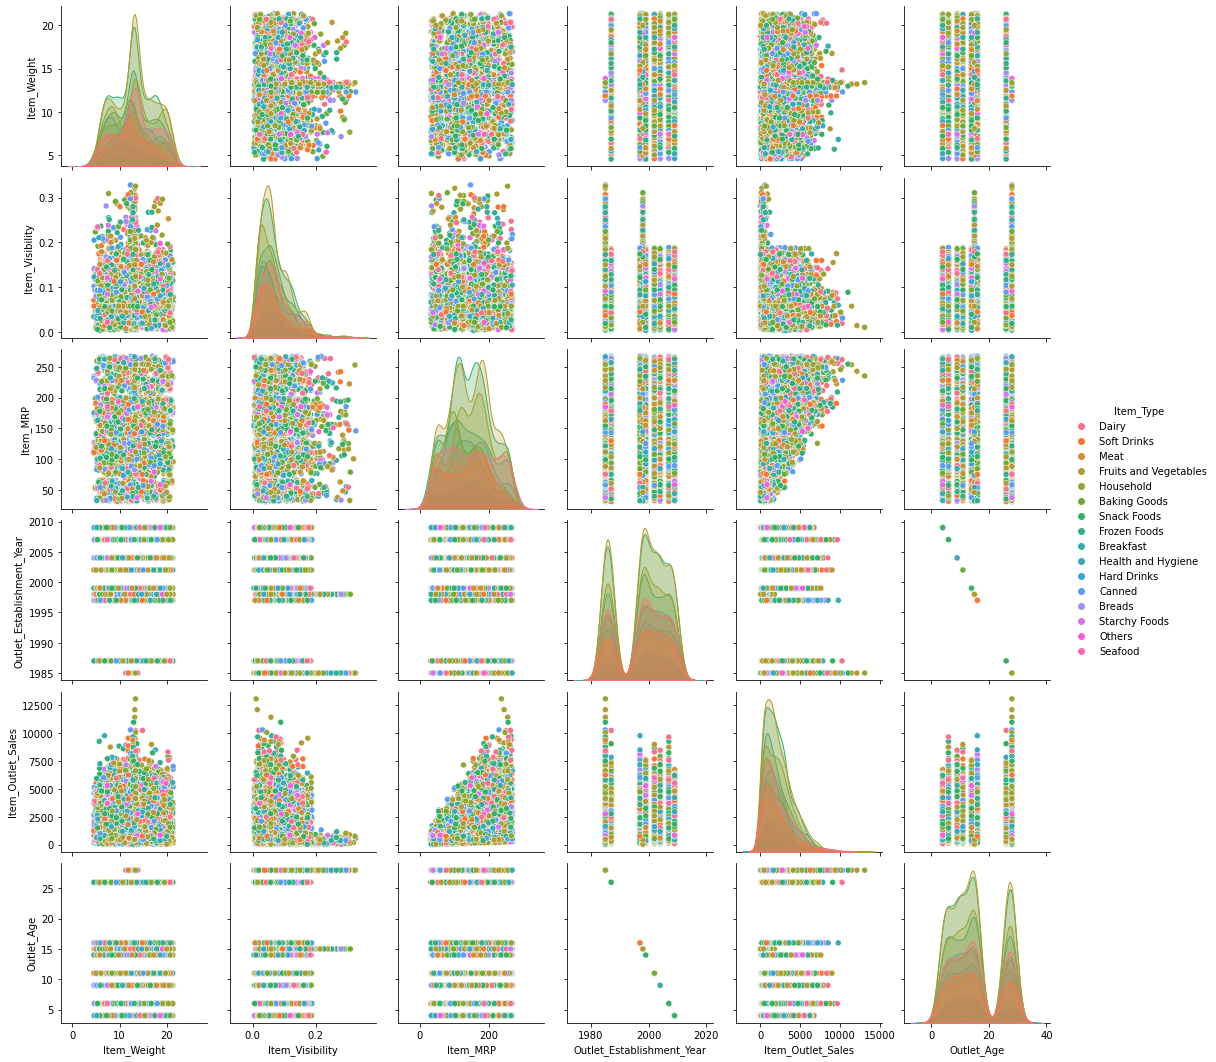

In [82]:
sns.pairplot(train, hue='Item_Type')

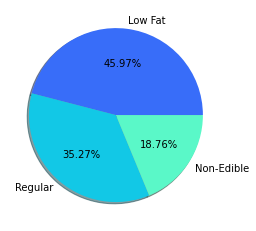

In [83]:
labels = 'Low Fat','Regular','Non-Edible'
fig, ax = plt.subplots()
ax.pie(train.Item_Fat_Content.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Consumer are buying more Low fat products than Regular fat products. This might be healthy conscious atitude of consumer. 

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

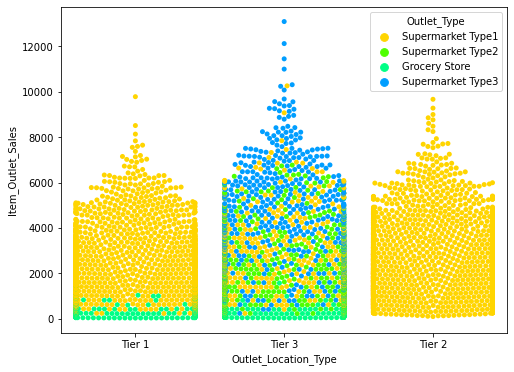

In [84]:
sns.set_palette('hsv')
plt.figure(figsize=(8,6))

sns.swarmplot(data=train, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type')

In [85]:
train.pivot_table(values='Item_Outlet_Sales', index='Outlet_Location_Type')

Item_Outlet_Sales
Outlet_Location_Type                   
Tier 1                      1876.909159
Tier 2                      2323.990559
Tier 3                      2279.627651

#### Comment -
1. Tier 3 Cities generate the most revenue and majority of revenue comes from Supermarket Type 2 and Type 3 along with Grocery stores.
2. Tier 2 and Tier 1 cities have more of Supermarket Type1 with a few Grocery stores.

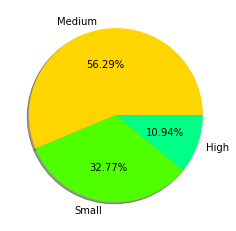

In [86]:
labels = 'Medium','Small','High' 
fig, ax = plt.subplots()
ax.pie(train.Outlet_Size.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Medium Sized outlets form the majority with 56.29% of total outlets, Small outlets are 32.77% while High sized outlets are 10.94% of the total outlets.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

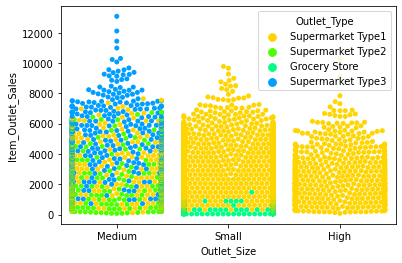

In [87]:
sns.swarmplot(data=train, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Type')

#### Comment -
1. Medium Sized Outlets generate the Highest sales and are a mix of Supermaraket Type1,Type2,Type3 and Grocery Stores.
2. High and small Sized Outlets comprise mostly of Supermarket Type1

Text(0.5, 1.0, 'Sales based on Item Visibility Sorted by Item Type')

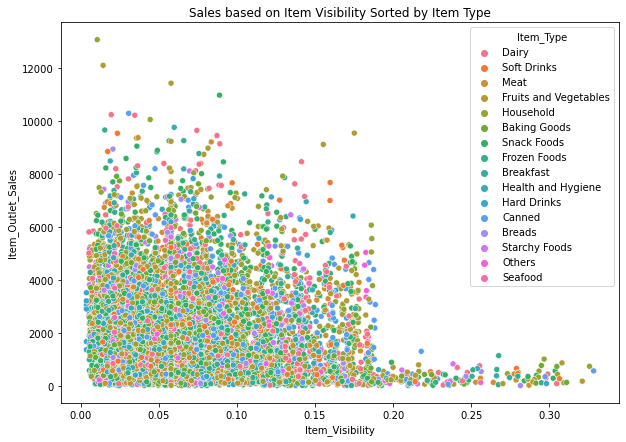

In [88]:
plt.figure(figsize=[10,7])
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales',hue='Item_Type',data=train)
plt.title("Sales based on Item Visibility Sorted by Item Type")

Text(0.5, 1.0, 'Sales based on Item Visibility Sorted by Item Type Combined')

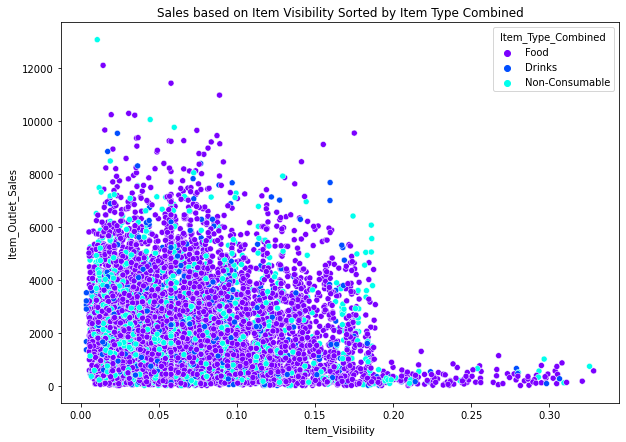

In [89]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=[10,7])
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales',hue='Item_Type_Combined',data=train)
plt.title("Sales based on Item Visibility Sorted by Item Type Combined")

#### Comment-
1. Maximum sales comes from Food items.

Text(0.5, 1.0, 'Sales based on Item Visibility Sorted by Item Type Combined')

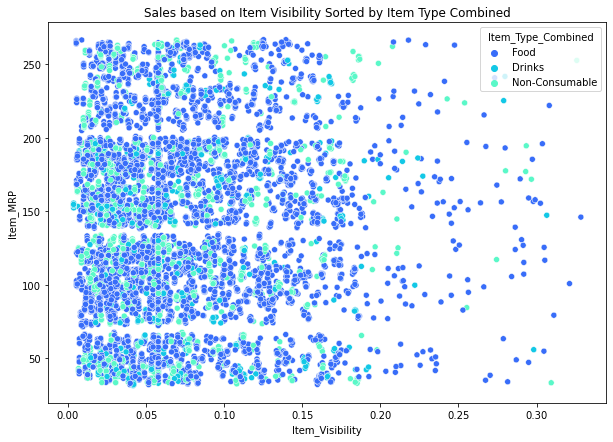

In [90]:
sns.set_palette('rainbow')
plt.figure(figsize=[10,7])
sns.scatterplot(x='Item_Visibility', y='Item_MRP',hue='Item_Type_Combined',data=train)
plt.title("Sales based on Item Visibility Sorted by Item Type Combined")

Text(0.5, 1.0, 'Sales based on Item MRP Sorted by outlet Type Combined')

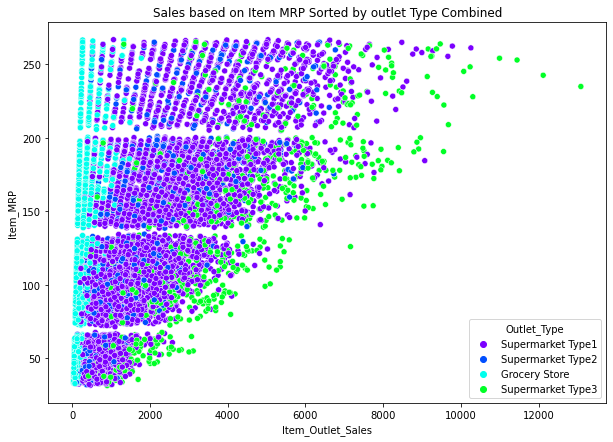

In [91]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=[10,7])
sns.scatterplot(x='Item_Outlet_Sales', y='Item_MRP',hue='Outlet_Type',data=train)
plt.title("Sales based on Item MRP Sorted by outlet Type Combined")

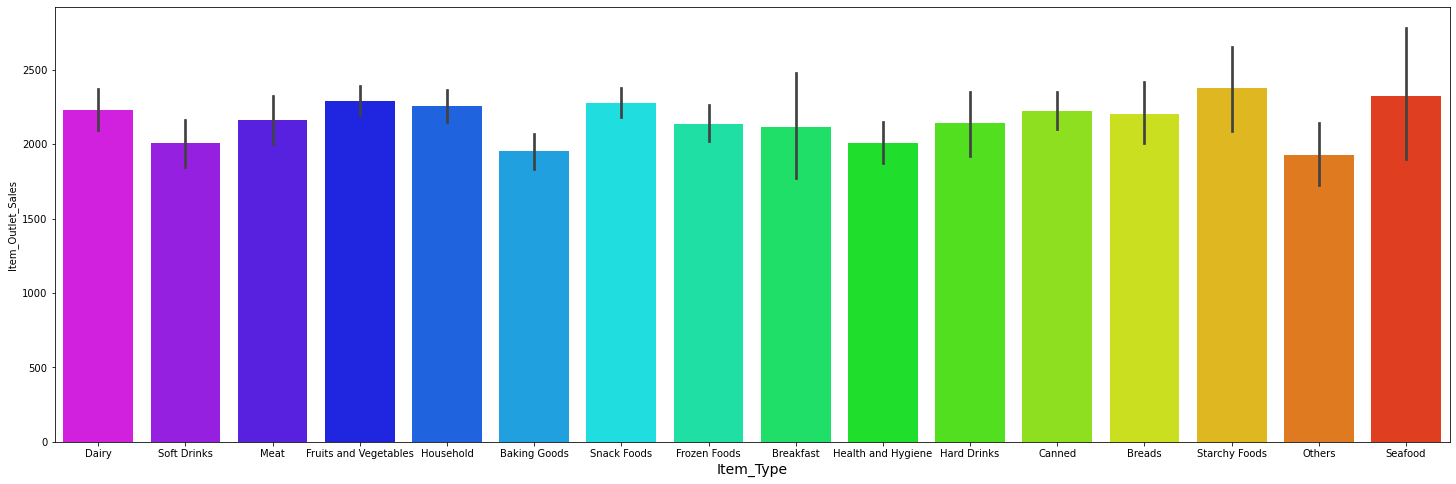

In [92]:
plt.figure(figsize=(25,8))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

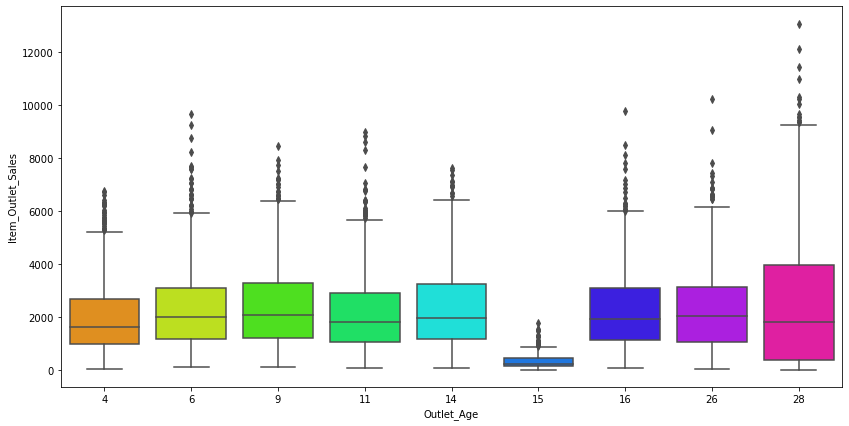

In [93]:
plt.figure(figsize = (14,7))
ax = sns.boxplot(x ='Outlet_Age' ,y='Item_Outlet_Sales',data=train,palette="hsv" )

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

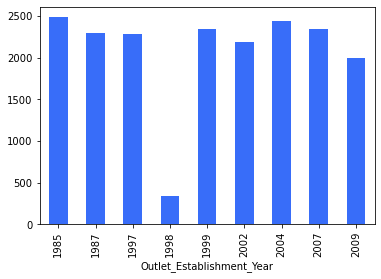

In [94]:
sns.set_palette('rainbow')
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

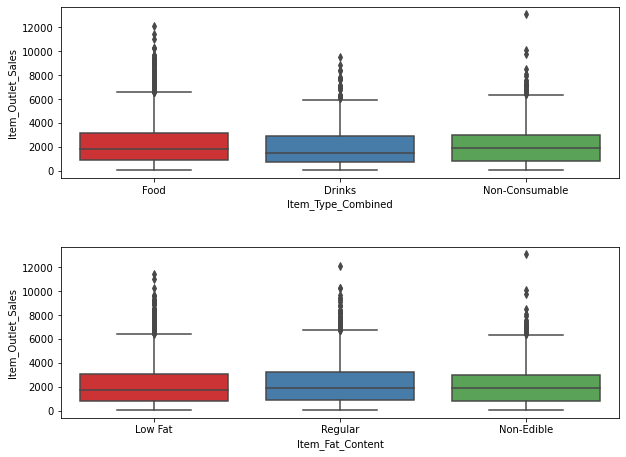

In [95]:
plt.figure(figsize = (10,9))

plt.subplot(411)
ax = sns.boxplot(x ='Item_Type_Combined' ,y='Item_Outlet_Sales',data=train,palette="Set1" )

plt.subplot(412)
ax = sns.boxplot(x ='Item_Fat_Content' ,y='Item_Outlet_Sales',data=train,palette="Set1" )

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

#### Lets start looking Outlet_Size, Outlet_Location_Type, and Outlet_Type distribution in Item_Outlet_Sale

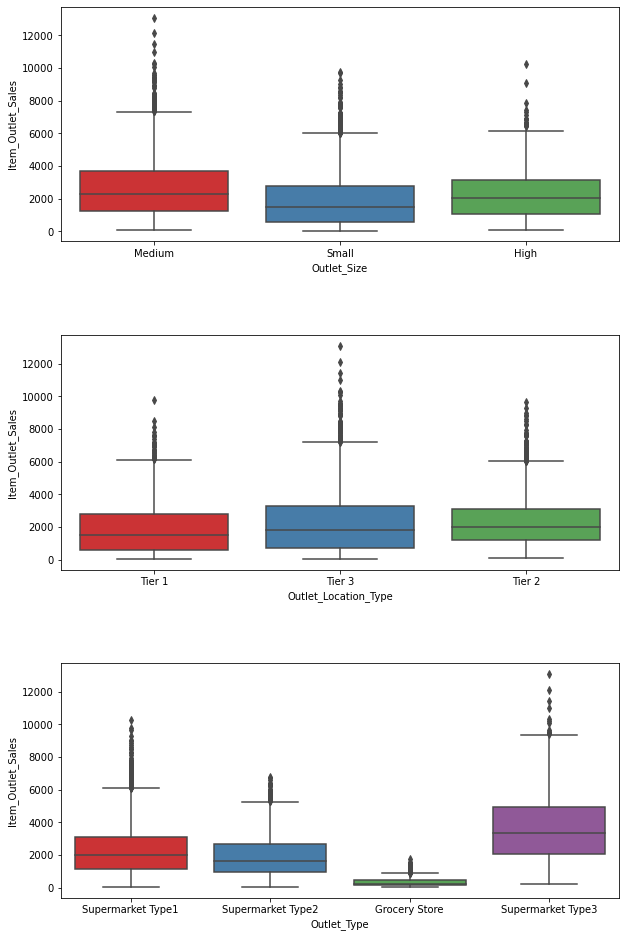

In [96]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

#### Comment -
1. Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.
2. In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.

#### Lets now plot Item_Outlet_Sales vs Item Type , Outlet Identifier

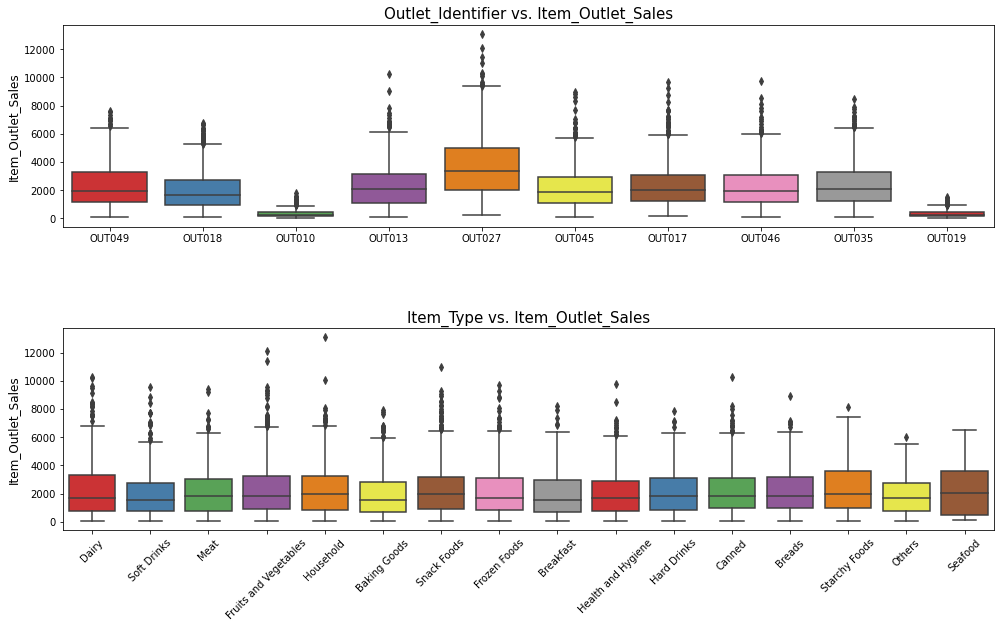

In [97]:
plt.figure(figsize = (14,16))

plt.subplot(411)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(412)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1584x648 with 0 Axes>

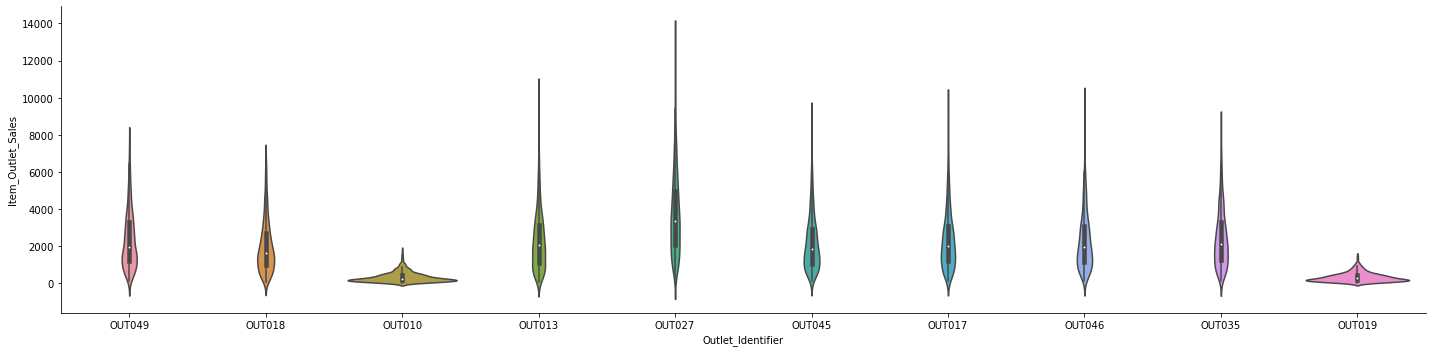

In [98]:
plt.figure(figsize = (22,9))
sns.catplot('Outlet_Identifier','Item_Outlet_Sales',kind = 'violin',data = train,aspect = 4)
plt.tight_layout()

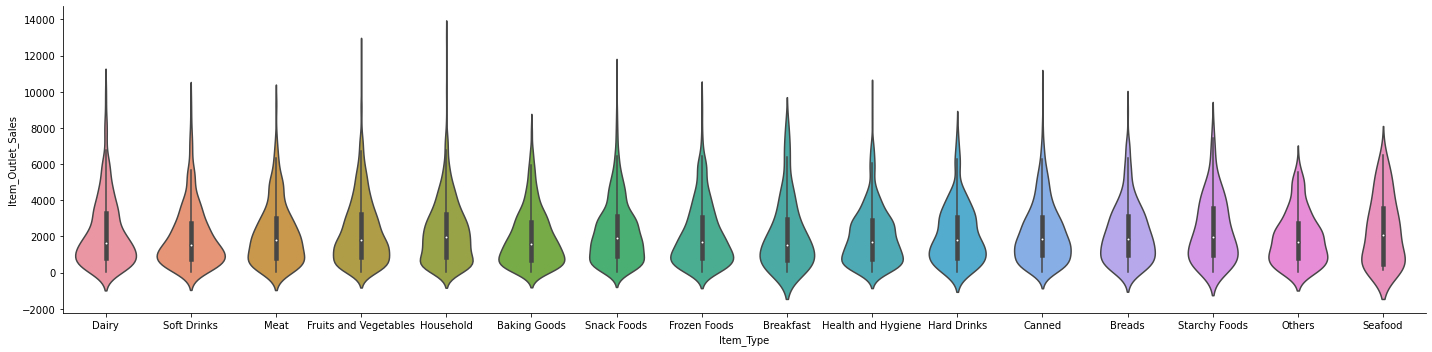

In [99]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data = train,aspect=4)

#### Comment - 
1. The width of a violin plot at a particular level indicates the concentration or density of data at that level. The height of a violin tells us about the range of the target variable values.
2. The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.

--------------------------------------------------------------------------------------------------------------------------

# Outliers Detection and Removal In Training data

In [100]:
df_train =train.copy()
Q1 =df_train.quantile(0.25)
Q3= df_train.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Item_Weight                     6.6900
Item_Visibility                 0.0615
Item_MRP                       91.8172
Outlet_Establishment_Year      17.0000
Item_Outlet_Sales            2267.0490
Outlet_Age                     17.0000
dtype: float64


In [101]:
df_train_new =df_train[~((df_train <(Q1 - 1.5*IQR)) | (df_train >(Q3 + 1.5*IQR))).any(axis=1)]
print(df_train_new.shape)

(8164, 14)


In [102]:
train.shape

(8523, 14)

##### Data Loss

In [103]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((8523-8164)/8523)*100,'%')

Percentage Data Loss : 4.212131878446557 %


----------------------------------------------------------------------------------------------------------------------------

# Outliers Detection and Removal In Testing data

In [104]:
df_test =test.copy()
Q1 =df_test.quantile(0.25)
Q3= df_test.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Item_Weight                   6.655000
Item_Visibility               0.060255
Item_MRP                     91.614600
Outlet_Establishment_Year    17.000000
Outlet_Age                   17.000000
dtype: float64


In [105]:
df_test_new =df_test[~((df_test <(Q1 - 1.5*IQR)) | (df_test >(Q3 + 1.5*IQR))).any(axis=1)]
print(df_test_new.shape)

(5547, 13)


In [106]:
test.shape

(5681, 13)

##### Data Loss

In [107]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((5681-5547)/5681)*100,'%')

Percentage Data Loss : 2.358739658510826 %


---------------------------------------------------------------------------------------------------------------------------

# Multicollinearity, Label Encoding, Correlation and Skewness Handling in Train Data

### 1. Skewness of features

In [108]:
df_train_new.skew()

Item_Weight                  0.085535
Item_Visibility              0.817387
Item_MRP                     0.151467
Outlet_Establishment_Year   -0.439854
Item_Outlet_Sales            0.767719
Outlet_Age                   0.439854
dtype: float64

#### Comment -
1. Optimal range for skewness is -0.5 to 0.5.
2. Item_Visibility and Item_Outlet_Sales are Skewed in nature, need to transform.

#### Transforming positive or right skew data using boxcox transformation

In [109]:
from scipy.stats import boxcox

In [110]:
df_train_new['Item_Visibility']=boxcox(df_train_new['Item_Visibility'],0.5)

In [111]:
df_train_new['Item_Outlet_Sales']=boxcox(df_train_new['Item_Outlet_Sales'],0.5)

In [112]:
df_train_new.skew()

Item_Weight                  0.085535
Item_Visibility              0.216697
Item_MRP                     0.151467
Outlet_Establishment_Year   -0.439854
Item_Outlet_Sales            0.050109
Outlet_Age                   0.439854
dtype: float64

### 2. Corrleation 

In [113]:
df_train_new.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012483  0.026905   
Item_Visibility              -0.012483         1.000000  0.001078   
Item_MRP                      0.026905         0.001078  1.000000   
Outlet_Establishment_Year    -0.008778        -0.030321  0.026834   
Item_Outlet_Sales             0.008238        -0.084008  0.553883   
Outlet_Age                    0.008778         0.030321 -0.026834   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                -0.008778           0.008238   
Item_Visibility                            -0.030321          -0.084008   
Item_MRP                                    0.026834           0.553883   
Outlet_Establishment_Year                   1.000000           0.030331   
Item_Outlet_Sales                           0.030331           1.000000   
Outlet_Age                                 -1.000000          -0.030331   

                           Outlet_Age  
Item_Weight                  0.008778  
Item_Visibility              0.030321  
Item_MRP                    -0.026834  
Outlet_Establishment_Year   -1.000000  
Item_Outlet_Sales           -0.030331  
Outlet_Age                   1.000000

<AxesSubplot:>

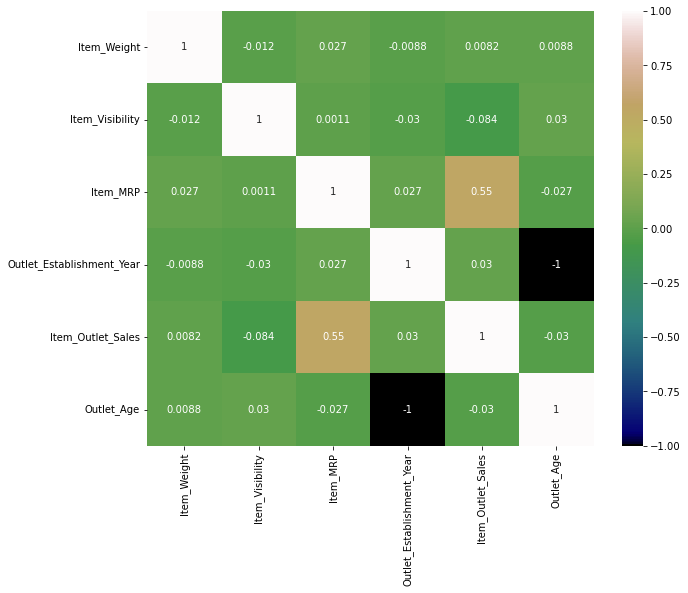

In [114]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train_new.corr(),annot=True,  cmap='gist_earth')

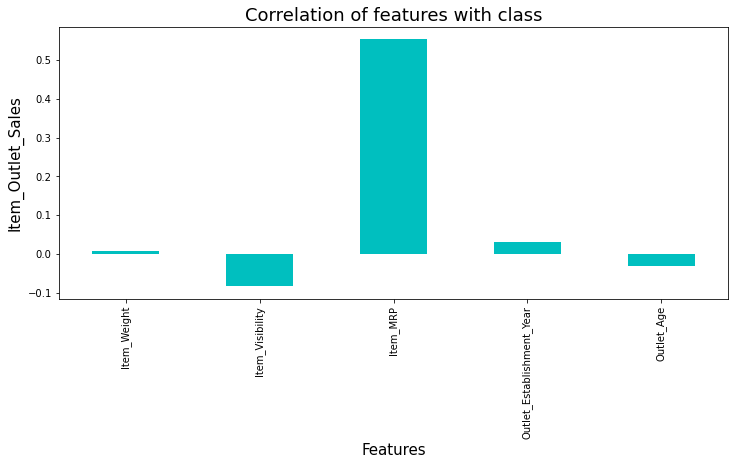

In [115]:
plt.figure(figsize = (12,5))
df_train_new.corr()['Item_Outlet_Sales'].drop(['Item_Outlet_Sales']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Item_Outlet_Sales',fontsize=15)
plt.title('Correlation of features with class',fontsize = 18)
plt.show()

### 3. Checking Multicollinearity between features using variance_inflation_factor

In [116]:
df2=df_train_new.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined'])

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]
vif['Features']= df2.columns
vif

VIF                   Features
0   1.001063                Item_Weight
1   1.011453            Item_Visibility
2   1.448705                   Item_MRP
3  99.964922  Outlet_Establishment_Year
4   1.458085          Item_Outlet_Sales
5   4.173947                 Outlet_Age

In [118]:
df3=df2.drop(columns=['Outlet_Establishment_Year'])

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df3.values,i) for i in range(df3.shape[1])]
vif['Features']= df3.columns
vif

VIF           Features
0   9.281161        Item_Weight
1  16.923520    Item_Visibility
2   8.633609           Item_MRP
3  10.024772  Item_Outlet_Sales
4   4.053296         Outlet_Age

### 4. Label Encoding on Train Data

In [120]:
df_train_new['Item_Fat_Content']=df_train_new['Item_Fat_Content'].astype('category')
df_train_new['Item_Type']=df_train_new['Item_Type'].astype('category')
df_train_new['Outlet_Identifier']=df_train_new['Outlet_Identifier'].astype('category')
df_train_new['Outlet_Size']=df_train_new['Outlet_Size'].astype('category')
df_train_new['Outlet_Location_Type']=df_train_new['Outlet_Location_Type'].astype('category')
df_train_new['Outlet_Type']=df_train_new['Outlet_Type'].astype('category')
df_train_new['Item_Type_Combined']=df_train_new['Item_Type_Combined'].astype('category')

In [121]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [122]:
df_train_new['Item_Fat_Content']=labelencoder.fit_transform(df_train_new['Item_Fat_Content'])
df_train_new['Item_Type']=labelencoder.fit_transform(df_train_new['Item_Type'])
df_train_new['Outlet_Identifier']=labelencoder.fit_transform(df_train_new['Outlet_Identifier'])
df_train_new['Outlet_Size']=labelencoder.fit_transform(df_train_new['Outlet_Size'])
df_train_new['Outlet_Location_Type']=labelencoder.fit_transform(df_train_new['Outlet_Location_Type'])
df_train_new['Outlet_Type']=labelencoder.fit_transform(df_train_new['Outlet_Type'])
df_train_new['Item_Type_Combined']=labelencoder.fit_transform(df_train_new['Item_Type_Combined'])

In [123]:
# droping item Identifier and Outlet_Establishment_Year as we created alternate columns for them.
df_train_new=df_train_new.drop(columns=['Outlet_Establishment_Year','Item_Identifier'])

In [124]:
df_train_new.shape

(8164, 12)

In [125]:
df_train_new.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0         9.30                 0        -1.746644          4  249.8092   
1         5.92                 2        -1.722308         14   48.2692   
2        17.50                 0        -1.741079         10  141.6180   
3        19.20                 2        -1.519199          6  182.0950   
4         8.93                 1        -1.519199          9   53.8614   

   Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                  9            1                     0            1   
1                  3            1                     2            2   
2                  9            1                     0            1   
3                  0            2                     2            0   
4                  1            0                     2            1   

   Item_Outlet_Sales  Item_Type_Combined  Outlet_Age  
0         120.231551                   1          14  
1          40.115213                   0           4  
2          89.591921                   1          14  
3          52.125040                   1          15  
4          61.077895                   2          26

#### 4.1. variance_inflation_factor after label encoding

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df_train_new.values,i) for i in range(df_train_new.shape[1])]
vif['Features']= df_train_new.columns
vif

VIF              Features
0    9.632625           Item_Weight
1    2.070427      Item_Fat_Content
2   40.212017       Item_Visibility
3    3.955471             Item_Type
4   10.172085              Item_MRP
5   14.019086     Outlet_Identifier
6    7.775591           Outlet_Size
7   12.944158  Outlet_Location_Type
8    9.584410           Outlet_Type
9   14.480227     Item_Outlet_Sales
10   5.594035    Item_Type_Combined
11   4.782459            Outlet_Age

#### 4.2. Heamap of correlation after label encoding

<AxesSubplot:>

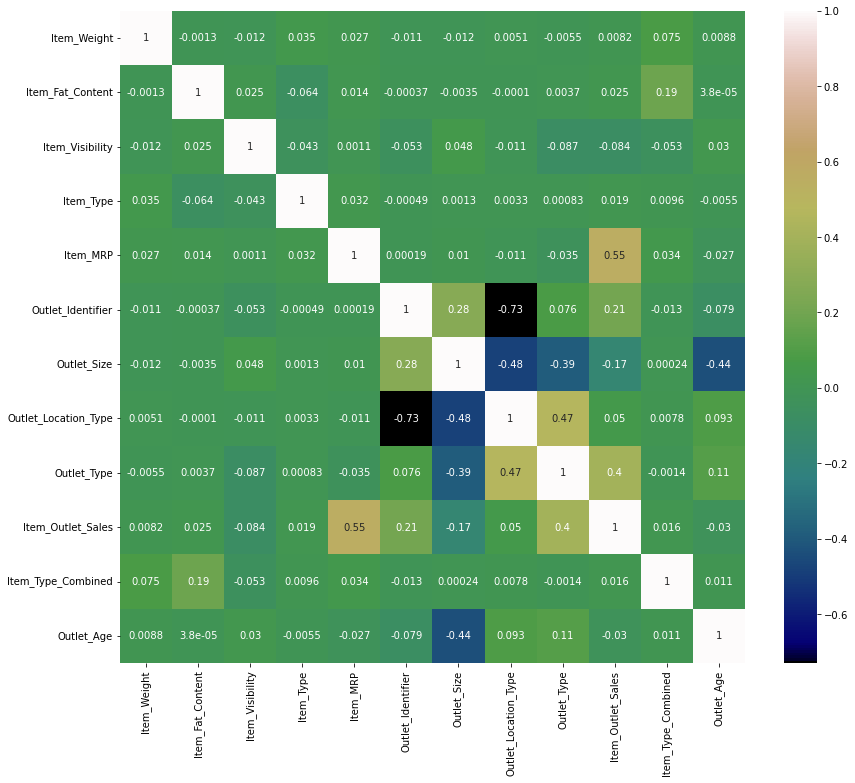

In [127]:
plt.figure(figsize=(14,12))
sns.heatmap(df_train_new.corr(),annot=True,  cmap='gist_earth')

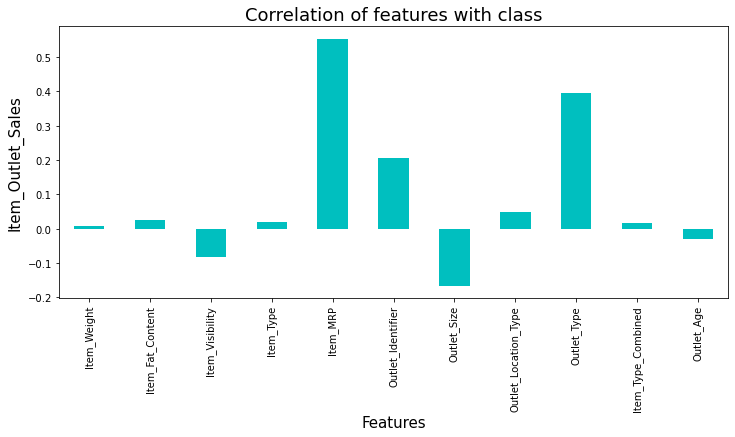

In [128]:
plt.figure(figsize = (12,5))
df_train_new.corr()['Item_Outlet_Sales'].drop(['Item_Outlet_Sales']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Item_Outlet_Sales',fontsize=15)
plt.title('Correlation of features with class',fontsize = 18)
plt.show()

----------------------------------------------------------------------------------------------------------------------------

# Multicollinearity, Label Encoding, Correlation and Skewness Handling in Test Data

### 1. Skewness of features

In [129]:
df_test_new.skew()

Item_Weight                  0.140897
Item_Visibility              0.807693
Item_MRP                     0.131380
Outlet_Establishment_Year   -0.417330
Outlet_Age                   0.417330
dtype: float64

#### Transforming positive or right skew data using boxcox transformation

In [130]:
from scipy.stats import boxcox

In [131]:
df_test_new['Item_Visibility']=boxcox(df_test_new['Item_Visibility'],0.5)

In [132]:
df_test_new.skew()

Item_Weight                  0.140897
Item_Visibility              0.191677
Item_MRP                     0.131380
Outlet_Establishment_Year   -0.417330
Outlet_Age                   0.417330
dtype: float64

### 2. Correlation

In [133]:
df_test_new.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014062  0.043981   
Item_Visibility              -0.014062         1.000000 -0.000414   
Item_MRP                      0.043981        -0.000414  1.000000   
Outlet_Establishment_Year     0.013788        -0.056786 -0.010225   
Outlet_Age                   -0.013788         0.056786  0.010225   

                           Outlet_Establishment_Year  Outlet_Age  
Item_Weight                                 0.013788   -0.013788  
Item_Visibility                            -0.056786    0.056786  
Item_MRP                                   -0.010225    0.010225  
Outlet_Establishment_Year                   1.000000   -1.000000  
Outlet_Age                                 -1.000000    1.000000

<AxesSubplot:>

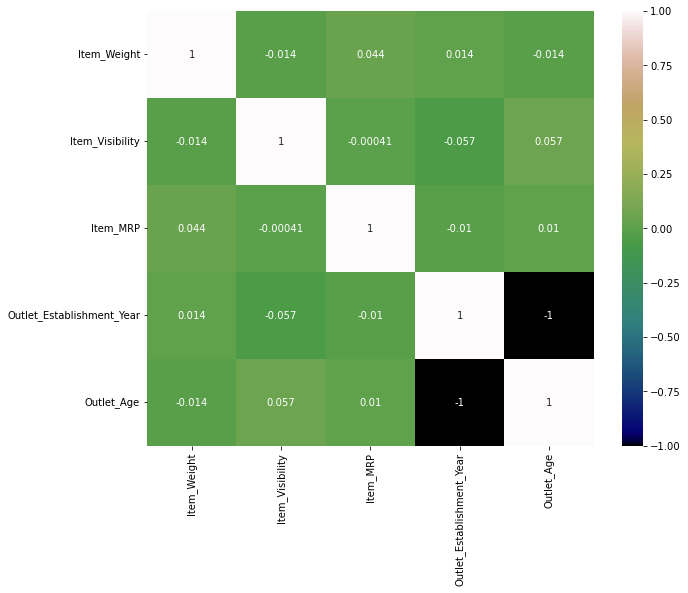

In [134]:
plt.figure(figsize=(10,8))
sns.heatmap(df_test_new.corr(),annot=True,  cmap='gist_earth')

### 3. Checking Multicollinearity between features using variance_inflation_factor

In [135]:
df4=df_test_new.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined'])

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df4.values,i) for i in range(df4.shape[1])]
vif['Features']= df4.columns
vif

VIF                   Features
0    1.002318                Item_Weight
1    1.003413            Item_Visibility
2    1.002056                   Item_MRP
3  105.263455  Outlet_Establishment_Year
4    4.178825                 Outlet_Age

### 4. Label Encoding on Test Data

In [137]:
df_test_new['Item_Fat_Content']=df_test_new['Item_Fat_Content'].astype('category')
df_test_new['Item_Type']=df_test_new['Item_Type'].astype('category')
df_test_new['Outlet_Identifier']=df_test_new['Outlet_Identifier'].astype('category')
df_test_new['Outlet_Size']=df_test_new['Outlet_Size'].astype('category')
df_test_new['Outlet_Location_Type']=df_test_new['Outlet_Location_Type'].astype('category')
df_test_new['Outlet_Type']=df_test_new['Outlet_Type'].astype('category')
df_test_new['Item_Type_Combined']=df_test_new['Item_Type_Combined'].astype('category')

In [138]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [139]:
df_test_new['Item_Fat_Content']=labelencoder.fit_transform(df_test_new['Item_Fat_Content'])
df_test_new['Item_Type']=labelencoder.fit_transform(df_test_new['Item_Type'])
df_test_new['Outlet_Identifier']=labelencoder.fit_transform(df_test_new['Outlet_Identifier'])
df_test_new['Outlet_Size']=labelencoder.fit_transform(df_test_new['Outlet_Size'])
df_test_new['Outlet_Location_Type']=labelencoder.fit_transform(df_test_new['Outlet_Location_Type'])
df_test_new['Outlet_Type']=labelencoder.fit_transform(df_test_new['Outlet_Type'])
df_test_new['Item_Type_Combined']=labelencoder.fit_transform(df_test_new['Item_Type_Combined'])

In [140]:
# droping item Identifier and Outlet_Establishment_Year as we created alternate columns for them.
df_test_new=df_test_new.drop(columns=['Outlet_Establishment_Year','Item_Identifier'])

In [141]:
df_test_new.shape

(5547, 11)

# Standard Scaling

### 1. Standard Scaling of Train Data

In [142]:
X=df_train_new.drop(columns =['Item_Outlet_Sales'])
Y=df_train_new['Item_Outlet_Sales']

In [143]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale_train = scaler.fit_transform(X)

In [144]:
X_scale_train

array([[-0.83463523, -0.99978137, -1.40762716, ..., -0.26638538,
        -0.18241886, -0.10833374],
       [-1.62526001,  1.23736132, -1.26145088, ...,  1.03431452,
        -2.09173624, -1.3150968 ],
       [ 1.08344856, -0.99978137, -1.37419751, ..., -0.26638538,
        -0.18241886, -0.10833374],
       ...,
       [-0.53054877,  0.11878998, -0.6760042 , ..., -0.26638538,
         1.72689852, -0.71171527],
       [-1.32351268,  1.23736132,  1.64850929, ...,  1.03431452,
        -0.18241886, -1.3150968 ],
       [ 0.45188438, -0.99978137, -0.38450749, ..., -0.26638538,
        -2.09173624,  0.13301887]])

### 2. Standard Scaling of Test Data

In [145]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale_test = scaler.fit_transform(df_test_new)

In [146]:
X_scale_test

array([[ 1.8846675 , -0.7380346 , -1.91965624, ..., -0.29016951,
        -0.19289173, -0.12388644],
       [-1.0287216 ,  1.35495003, -0.57243787, ..., -0.29016951,
        -0.19289173, -1.08148694],
       [ 0.44552349, -0.7380346 ,  0.90414135, ..., -1.56457196,
         1.71776972, -0.00418637],
       ...,
       [-0.63090943, -0.7380346 ,  0.35571781, ..., -0.29016951,
         1.71776972, -0.48298662],
       [ 0.6093285 ,  1.35495003, -0.02007525, ..., -0.29016951,
        -0.19289173, -1.08148694],
       [-0.74791301,  1.35495003,  1.00358886, ..., -0.29016951,
        -0.19289173, -0.48298662]])

# Machine Learning Model Building

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale_train, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5469, 11)
Training target vector size: (5469,)
Test feature matrix size: (2695, 11)
Test target vector size: (2695,)


####  Finding Best Random state

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale_train, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.5538321382018198 on Random_state 16


## Linear Regression : Base model

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale_train, Y, random_state=16, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted sales:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual sales:'+'\033[0m\n',Y_test)

Predicted sales:
 [ 72.90088063  98.58856561  47.16704277 ... 110.94323867  87.96589504
  44.2035555 ]


Actual sales:
 2556     35.070355
1802    102.596489
4938     27.009847
5826    135.895787
7077     52.272453
           ...    
6605     65.088062
3629     89.766216
4098     66.773855
5628    107.946645
7265     74.943444
Name: Item_Outlet_Sales, Length: 2695, dtype: float64


### Linear Regression Evaluation Matrix

In [151]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 18.874841483738166
Mean squared error : 548.9712797635653
Root Mean Squared Error: 23.43013614479364


 R2 Score :
0.5538321382018198


 True Values Vs Predicted Value plot :


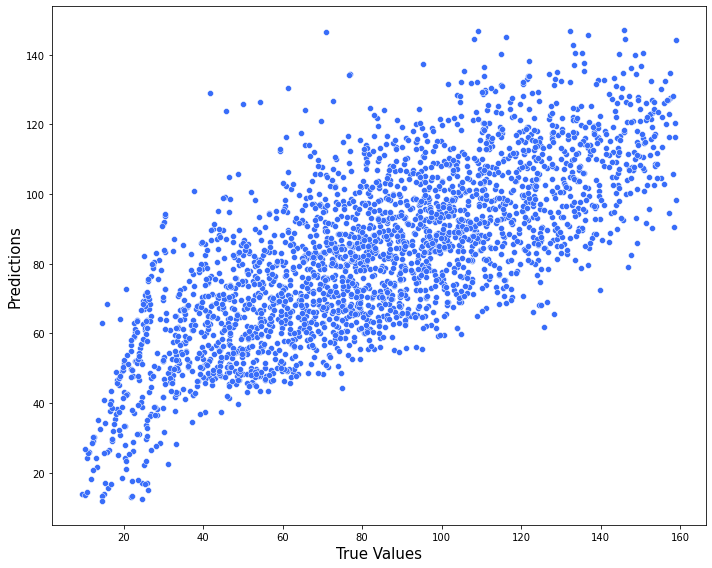

In [152]:
plt.figure(figsize=(10,8))
y_pred=lin_reg.predict(X_test)
sns.scatterplot(Y_test.round(2), y_pred, cmap='hsv')
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Finding n_neighbors for KNN Regressor

In [153]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 29.32299640486515
RMSE value for k=  2 is: 25.23156742797232
RMSE value for k=  3 is: 23.481427167490754
RMSE value for k=  4 is: 22.579300044092182
RMSE value for k=  5 is: 22.16043976303122
RMSE value for k=  6 is: 22.032111990650705
RMSE value for k=  7 is: 21.91813220647353
RMSE value for k=  8 is: 21.846029619787103
RMSE value for k=  9 is: 21.72969532329676
RMSE value for k=  10 is: 21.74319438136665
RMSE value for k=  11 is: 21.695772864875153
RMSE value for k=  12 is: 21.61904101194721
RMSE value for k=  13 is: 21.56416851924708
RMSE value for k=  14 is: 21.56581280449929
RMSE value for k=  15 is: 21.51762955416595
RMSE value for k=  16 is: 21.513403074734452
RMSE value for k=  17 is: 21.55154916124068
RMSE value for k=  18 is: 21.527705787644546
RMSE value for k=  19 is: 21.53769262821701
RMSE value for k=  20 is: 21.52478469362475
RMSE value for k=  21 is: 21.52657341512055
RMSE value for k=  22 is: 21.547756994049184
RMSE value for k=  23 is: 21.5858

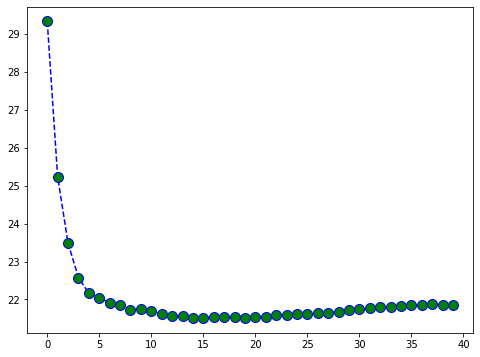

In [154]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(40), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### Comment- 
At k= 16, we get the minimum RMSE value which approximately 21.513403074734452, and shoots up on further increasing the k value. We can safely say that k=20 will give us the best result in this case

---------------------------------------------------------------------------------------------------------------------------

## Applying other Regression Model

In [155]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
knn=KNeighborsRegressor(n_neighbors=16)
xgb=XGBRegressor()
model = [rf,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 16.135007939944227
Mean squared error : 435.76137194113755
Root Mean Squared Error: 20.874898130078087


 R2 Score :
0.6458417284471527




 Error of  SVR() :
Mean absolute error : 16.603164110791255
Mean squared error : 435.3848067495656
Root Mean Squared Error: 20.865876611097978


 R2 Score :
0.6461477759446168




 Error of  DecisionTreeRegressor() :
Mean absolute error : 21.980404500425028
Mean squared error : 839.685169322694
Root Mean Squared Error: 28.977321638182747


 R2 Score :
0.3175589500024444




 Error of  AdaBoostRegressor() :
Mean absolute error : 16.387970295019336
Mean squared error : 438.4308301837303
Root Mean Squared Error: 20.93873993782172


 R2 Score :
0.6436721678159114




 Error of  GradientBoostingRegressor() :
Mean absolute error : 15.377846017203508
Mean squared error : 390.333644424962
Root Mean Squared Error: 19.756863223319687


 R2 Score :
0.6827624068130076




 Error of  KNeighborsRegress

#### Here we can see that GradientBoostingRegressor() algorithm gives maximum R2 score : 0.6827636313072999 with Minimum Root Mean Squared Error: 19.756825093870162



 True Values Vs Predicted Value plot RandomForestRegressor() :


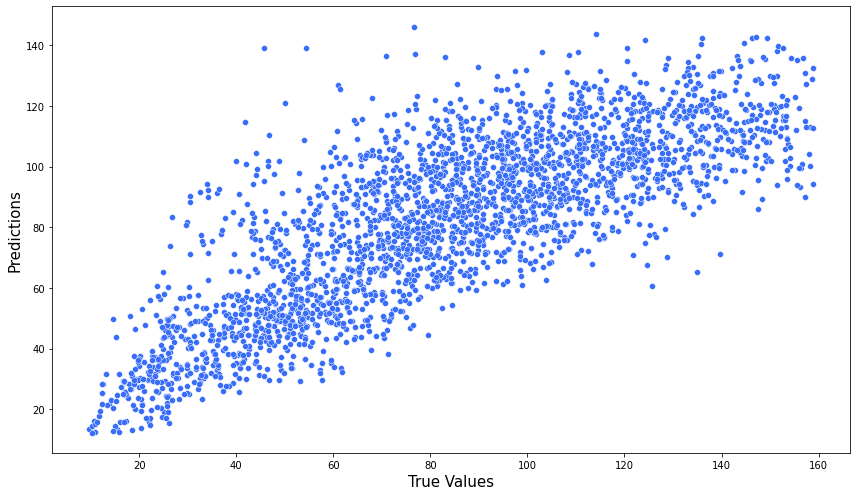





 True Values Vs Predicted Value plot SVR() :


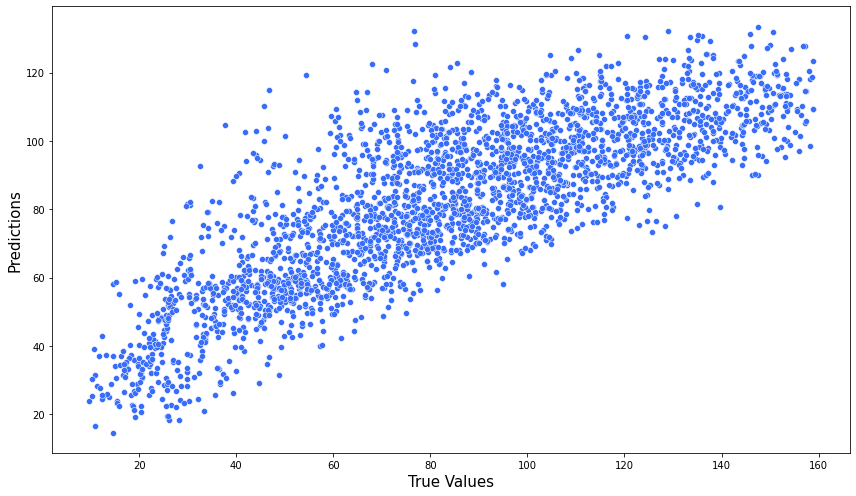





 True Values Vs Predicted Value plot DecisionTreeRegressor() :


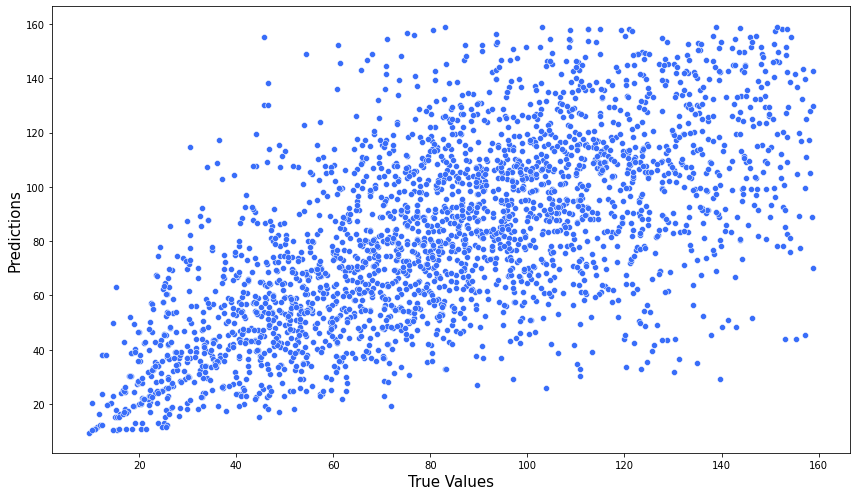





 True Values Vs Predicted Value plot AdaBoostRegressor() :


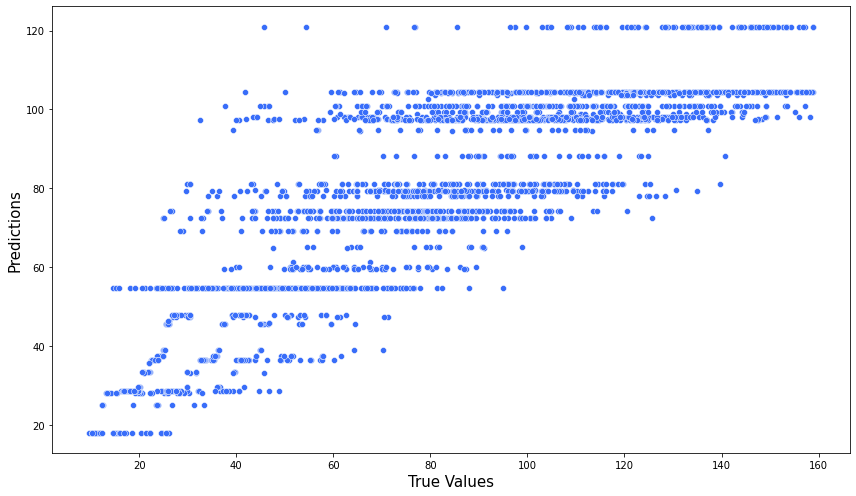





 True Values Vs Predicted Value plot GradientBoostingRegressor() :


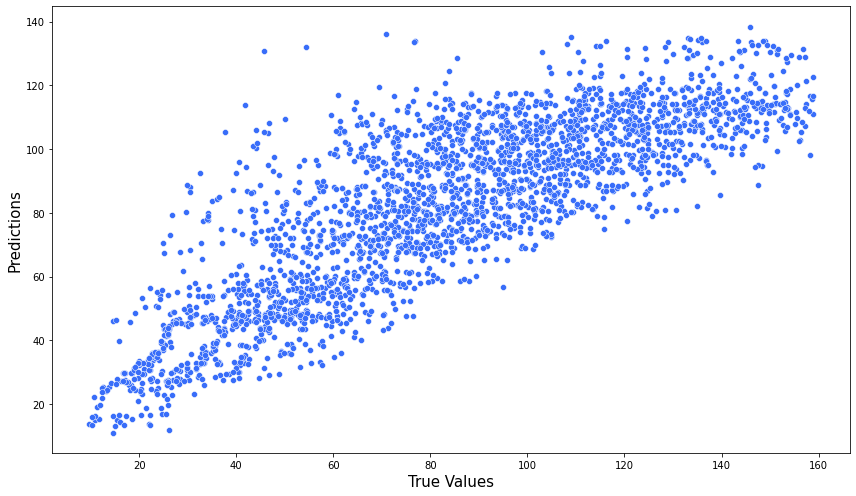





 True Values Vs Predicted Value plot KNeighborsRegressor(n_neighbors=15) :


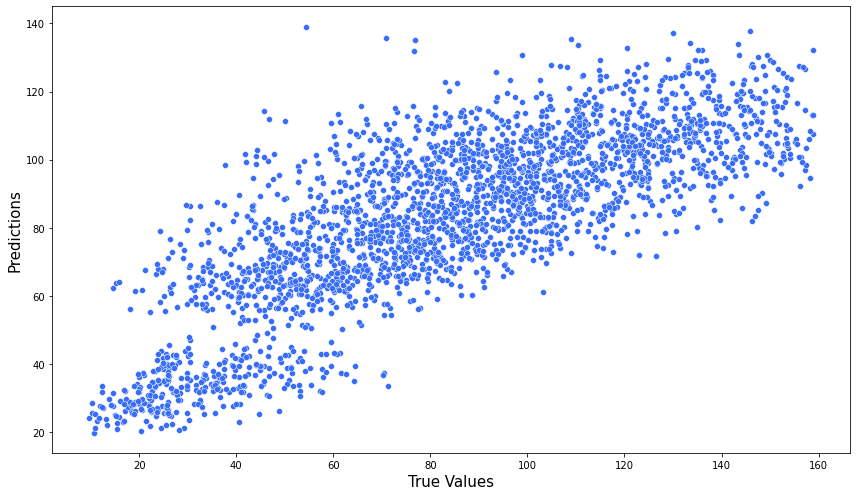





 True Values Vs Predicted Value plot XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) :


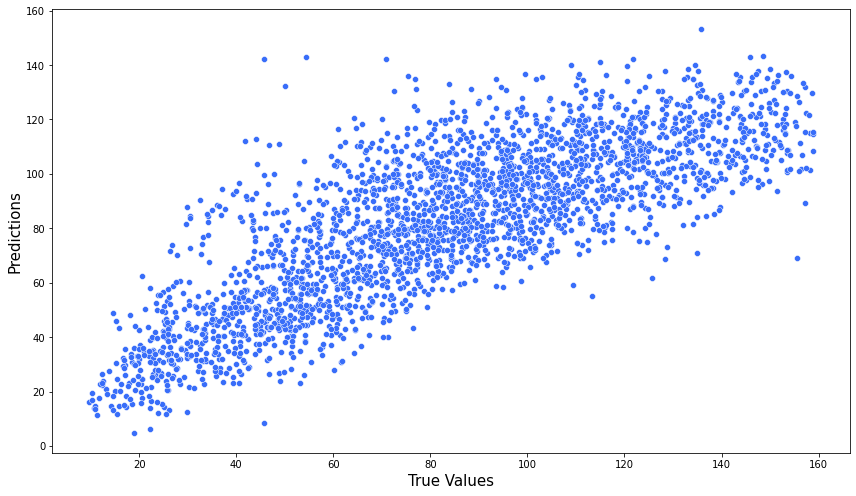

In [156]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
knn=KNeighborsRegressor(n_neighbors=15)
model = [rf,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    plt.figure(figsize=(12,7))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

# Cross Validation

In [157]:
from sklearn.model_selection import cross_val_score
model = [lin_reg,rf,svr,dtc,adb,gradb,knn,xgb]
for m in model:
    score = cross_val_score(m, X, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred))
    print('\n')
    print('==============================================================================================================')



Cross Validation Score : LinearRegression() :

Score : [0.5292995  0.51167276 0.5266652  0.52724571]
Mean Score : 0.5237207924293311
Std deviation : 0.0070244522702633885


 R2 Score :
0.6437123809860317




Cross Validation Score : RandomForestRegressor() :

Score : [0.59089172 0.58504733 0.62641799 0.60683107]
Mean Score : 0.6022970290867209
Std deviation : 0.0160468953785827


 R2 Score :
0.6437123809860317




Cross Validation Score : SVR() :

Score : [0.32304246 0.30544195 0.32345295 0.30144876]
Mean Score : 0.3133465296718927
Std deviation : 0.010002375039425767


 R2 Score :
0.6437123809860317




Cross Validation Score : DecisionTreeRegressor() :

Score : [0.23967087 0.24576344 0.29589529 0.22478013]
Mean Score : 0.25152743160458446
Std deviation : 0.0267288553498149


 R2 Score :
0.6437123809860317




Cross Validation Score : AdaBoostRegressor() :

Score : [0.59988175 0.61143643 0.6287814  0.63000212]
Mean Score : 0.6175254253566458
Std deviation : 0.012557268491406657


 R

#### From above cross validattion, we can see that Gradient Boosting Regressor() gives us maximum  R2 score(0.6238449573040779)  and with maximum mean score of 0.6504855259743363. So we will apply Hyperparameter tuning on Gradient Boosting Regressor

# Hyper Parameter Tuning : GridSearchCV

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
parameters = [{   'learning_rate': [0.01,0.03,0.04],
                  'subsample'    : [0.5, 0.3, 0.1],
                  'n_estimators' : [250,500,750],
                  'max_depth'    : [6,8,10]}] 

In [160]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameters,cv=3,n_jobs = -1, verbose=3)
GCV.fit(X_train,Y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.03, 0.04],
                          'max_depth': [6, 8, 10],
                          'n_estimators': [250, 500, 750],
                          'subsample': [0.5, 0.3, 0.1]}],
             verbose=3)

In [161]:
GCV.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.1}

# Final Model

In [162]:
Final_mod = GradientBoostingRegressor(learning_rate=0.01 ,n_estimators= 250, max_depth=6 ,subsample=0.5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 15.690965059231111
Mean squared error : 402.76923169170607
Root Mean Squared Error: 20.06911138271214


 R2 Score of Final Model :
0.6726555768466067




 True Values Vs Predicted Value plot :


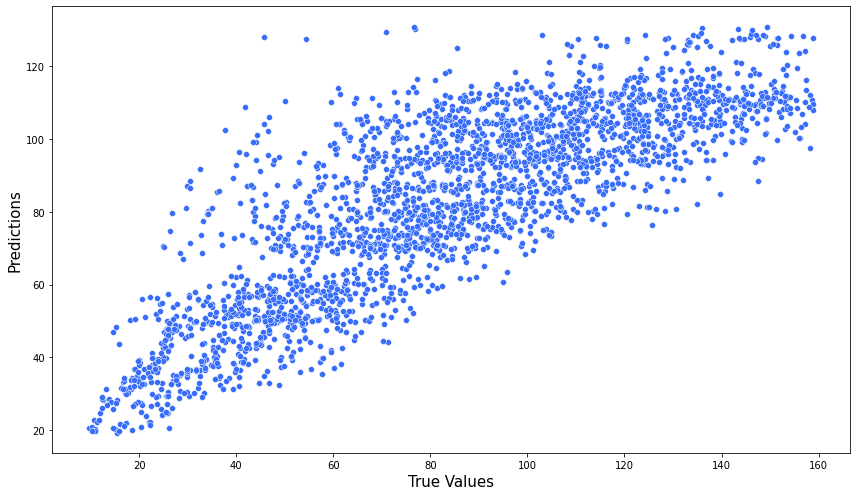

In [163]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.scatterplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

<AxesSubplot:>

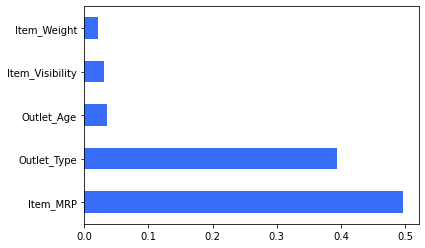

In [164]:
feat_importances = pd.Series(Final_mod.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

## Saving model

In [165]:
import joblib
joblib.dump(Final_mod,'Big_Data_Mart_Sales_Final.pkl')

['Big_Data_Mart_Sales_Final.pkl']

## Predication on Test data

In [166]:
y_pred=Final_mod.predict(X_scale_test)

In [167]:
y_pred

array([ 77.07704808,  70.43607319,  56.00902525, ...,  82.54647523,
       107.84647026,  70.56244831])